<a href="https://colab.research.google.com/github/EvenSol/NeqSim-Colab/blob/master/notebooks/thermodynamics/H2Sdistribution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#@title H2S distribution in oil and gas processing
#@markdown This notebook describes how to estimate H2S disdtribution in oil and gas processing in oil and gas production.
%%capture
!pip install neqsim
import neqsim
from neqsim.thermo.thermoTools import *
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import math
%matplotlib inline

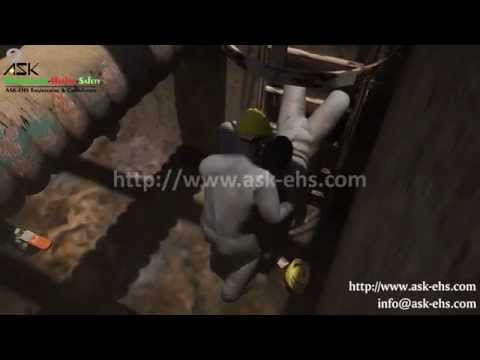

In [ ]:
#@title Fundamentals of H2S distribution
#@markdown Hydrogen Sulfide is a colorless, transparent gas with a characteristic of a rotten- egg odor at low concentrations and not detectable by odor at high concentration.
from IPython.display import YouTubeVideo
YouTubeVideo('Glwsp6OFW1s', width=600, height=400)

In [ ]:
from neqsim.thermo import fluid, fluid_df, addOilFractions, printFrame, dataFrame, fluidcreator,createfluid,createfluid2, TPflash, phaseenvelope
import pandas as pd

reservoirfluid = fluid('Electrolyte-CPA-EoS')
reservoirfluid.addComponent("H2S", 0.01, 'mol/sec')
reservoirfluid.addComponent("CO2", 0.1, 'mol/sec')
reservoirfluid.addComponent("nitrogen", 1.0, 'mol/sec')
reservoirfluid.addComponent("methane", 70.0, 'mol/sec')
reservoirfluid.addComponent("ethane", 4.3, 'mol/sec')
reservoirfluid.addComponent("propane", 1.0, 'mol/sec')
reservoirfluid.addComponent("water", 1.0, "kg/sec")

#Adding salts
reservoirfluid.addComponent("Na+", 0.01, 'mol/sec')
reservoirfluid.addComponent("Cl-", 0.01, 'mol/sec')

#Adding iron from corrosion
reservoirfluid.addComponent("Fe++", 0.00001, 'mol/sec')

#Adding some NaOH (0.5 mol/liter water)
reservoirfluid.addComponent("Na+", 0.5, 'mol/sec')
reservoirfluid.addComponent("OH-", 0.5, 'mol/sec')

reservoirfluid.chemicalReactionInit()
reservoirfluid.setMultiPhaseCheck(True)
reservoirfluid.setMixingRule(10)
reservoirfluid.setMultiPhaseCheck(True)
reservoirfluid.setTotalFlowRate(1.0, "MSm3/day")
reservoirfluid.setTemperature(55.0, "C")
reservoirfluid.setPressure(155.0, "bara")



TPflash(reservoirfluid)
printFrame(reservoirfluid)

print('pH ', reservoirfluid.getPhase('aqueous').getpH(), ' [-]')


ionCompResults = calcIonComposition(reservoirfluid)
scaleResults = checkScalePotential(reservoirfluid)

printFrame(reservoirfluid)
print("Composition of aqueous phase:")
print(pd.DataFrame(ionCompResults).to_markdown(index=False))
print("Relative solubility in salts:")
print(pd.DataFrame(scaleResults).to_markdown(index=False))


| 0                  | 1           | 2                           | 3                           | 4   | 5   | 6               |
|:-------------------|:------------|:----------------------------|:----------------------------|:----|:----|:----------------|
|                    | total       | GAS                         | AQUEOUS                     |     |     |                 |
| H2S                | 4.65874E-8  | 7.8277E-8                   | 4.17311E-9                  |     |     | [mole fraction] |
| CO2                | 3.87455E-10 | 6.76935E-10                 | 1.98496E-17                 |     |     | [mole fraction] |
| nitrogen           | 7.4998E-3   | 1.30911E-2                  | 1.60638E-5                  |     |     | [mole fraction] |
| methane            | 5.24986E-1  | 9.16056E-1                  | 1.55807E-3                  |     |     | [mole fraction] |
| ethane             | 3.22491E-2  | 5.62774E-2                  | 8.85021E-5                  |     |     | [m